In [ ]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.23.5 pmdarima==2.0.3
!pip install --upgrade --force-reinstall pmdarima


Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: pmdarima 2.0.3
Uninstalling pmdarima-2.0.3:
  Successfully uninstalled pmdarima-2.0.3
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (1.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 w

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
^C


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from pmdarima.arima import auto_arima

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/superstore/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

In [ ]:
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum()
monthly_sales.head()

,Sales
Order Date,
2015-01-31,14205.707
2015-02-28,4519.892
2015-03-31,55205.797
2015-04-30,27906.855
2015-05-31,23644.303


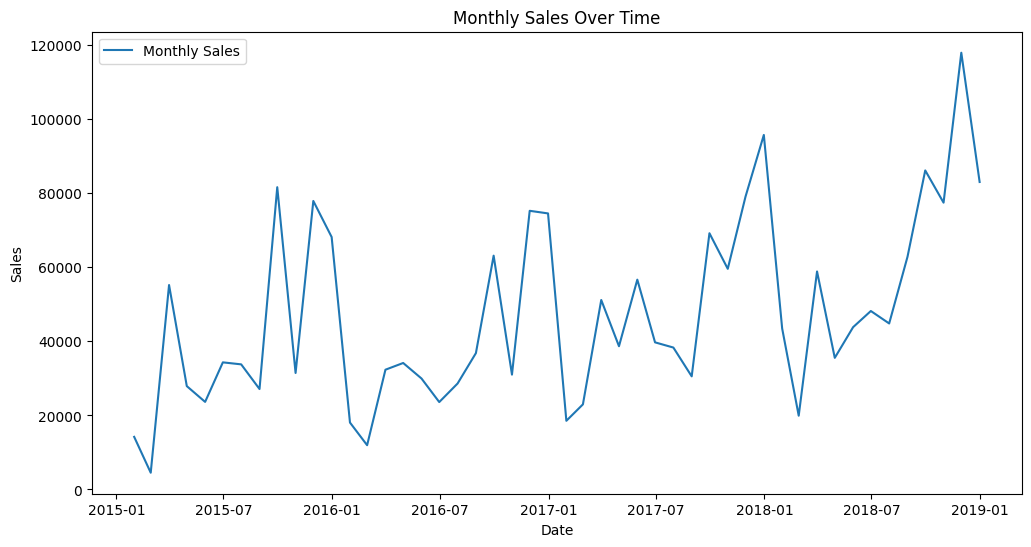

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
import matplotlib
print(matplotlib.__version__)
!pip uninstall matplotlib -y
!pip install matplotlib --no-cache-dir


3.10.1
Found existing installation: matplotlib 3.10.1
Uninstalling matplotlib-3.10.1:
  Successfully uninstalled matplotlib-3.10.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 25.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.41.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.


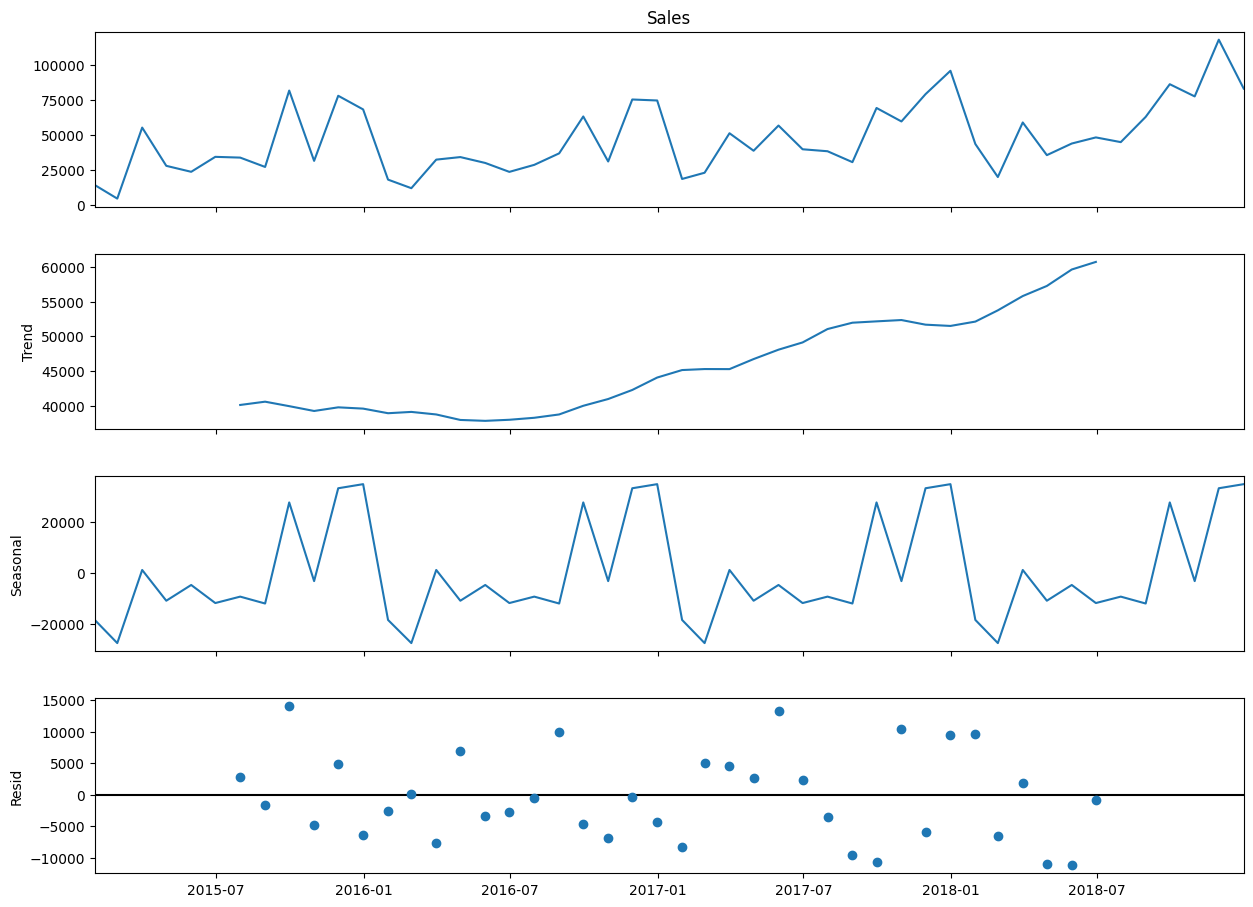

In [ ]:


decomposition = seasonal_decompose(monthly_sales, model='additive', period=12) # Added period=12
fig= decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

In short, "decomposing" a time series means separating it into its components: trend, seasonality, and residual. This helps to understand patterns in the data, such as the overall direction (trend), repeating patterns (seasonality) and random variations(residual)

Decomposition is useful for identifying trends, isolating seasonality, improving forecasts and detecting anomalies. The code uses an "additive" model where the time series is the sum of these components. The seasonal_decompose function performs the decomposition, and the results is plotted for visualization.

In [ ]:
def check_stationary(timeseries):
  from statsmodels.tsa.stattools import adfuller # Import adfuller here

  result= adfuller(timeseries)
  print('Augmented Dickey-Fuller test results:')
  print('ADF Statistic:', result[0])
  print('p-value', result[1])
  print('Critical values:')
  for key, value in result[4].items():
    print(f'\t{key}: {value}')
  return result[1] < 0.05

is_stationary = check_stationary(monthly_sales)
print(f"Time series is {'stationary' if is_stationary else 'non-stationary'}")

Augmented Dickey-Fuller test results:
ADF Statistic: -4.416136761430769
p-value 0.00027791039276670623
Critical values:
	1%: -3.5778480370438146
	5%: -2.925338105429433
	10%: -2.6007735310095064
Time series is stationary


what is stationarity?
a time series is considered stationary if its statistical properties like mean, variance, and autocorrelation remain constant over time. Stationary is an important assumption for many time series forecasting models.

- easier to predict and create forecasting models

In [ ]:
auto_model = auto_arima(monthly_sales,
                        start_p= 0, start_q=0,
                        max_p = 5, max_q=5,
                        m=12,
                        seasonal=True,
                        d= None,
                        trace=True,
                        error_action='ignore',
                        suppress_warning=True,
                        stepwise=True)

Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1085.632, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1096.560, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1076.500, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1077.487, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1094.708, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1089.579, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1078.250, Time=0.47 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1078.452, Time=0.09 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1080.901, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1079.864, Time=2.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1084.035, Time=0.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.635, Time=1.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1087.151, Time=0.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1075.267, Time=1.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1075.518, Time=0.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=1078.501, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=1076.937, Time=2.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=1076.040, Time=1.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1076.285, Time=1.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1076.328, Time=0.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,0)[12] intercept   : AIC=1078.253, Time=1.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[12]             : AIC=1071.915, Time=0.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[12]             : AIC=1086.029, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[12]             : AIC=1073.387, Time=3.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[12]             : AIC=1073.425, Time=1.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[12]             : AIC=1077.098, Time=0.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,1)[12]             : AIC=1075.363, Time=3.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12]             : AIC=1074.570, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,0)[12]             : AIC=1074.296, Time=1.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12]             : AIC=1074.696, Time=2.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12]             : AIC=1072.847, Time=1.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,0)[12]             : AIC=1074.949, Time=4.46 sec

Best model:  ARIMA(2,1,0)(1,0,0)[12]          
Total fit time: 36.144 seconds


this code uses the auto_arima function from the pmdarima library to automatically find the best parameters for an ARIMA model.
- What is arima?
ARIMA stands for Autoregressive integrated moving average, It's a model that uses past values of a time series to predict future values.

- Imagine you have monthly sales data and want to predict future sales. This ocode uses a tool auto_arima that automatically finds the best settings for a forecasting model. It considers things like past sales patterns, seasonality, and overall trends to create a model that can make accurate predictions


In [ ]:
model = ARIMA(monthly_sales,
              order = auto_model.order,
              seasonal_order=auto_model.seasonal_order)
results = model.fit()

In [ ]:
forecast_periods= 12
forecast = results.get_forecast(steps=forecast_periods)
mean_forecast = forecast.predicted_mean

In [ ]:
#confidence intervals for the sales
conf_int_95 = forecast.conf_int(alpha=0.05)
conf_int_80 = forecast.conf_int(alpha=0.20)
conf_int_70 = forecast.conf_int(alpha=0.30)

A confidence interval provides a range of values within which the actual future sales are likely to fall, along with a certain level of confidence.

Provide ranges for the predicted sales with different levels of confidence (95%, 80, 70)



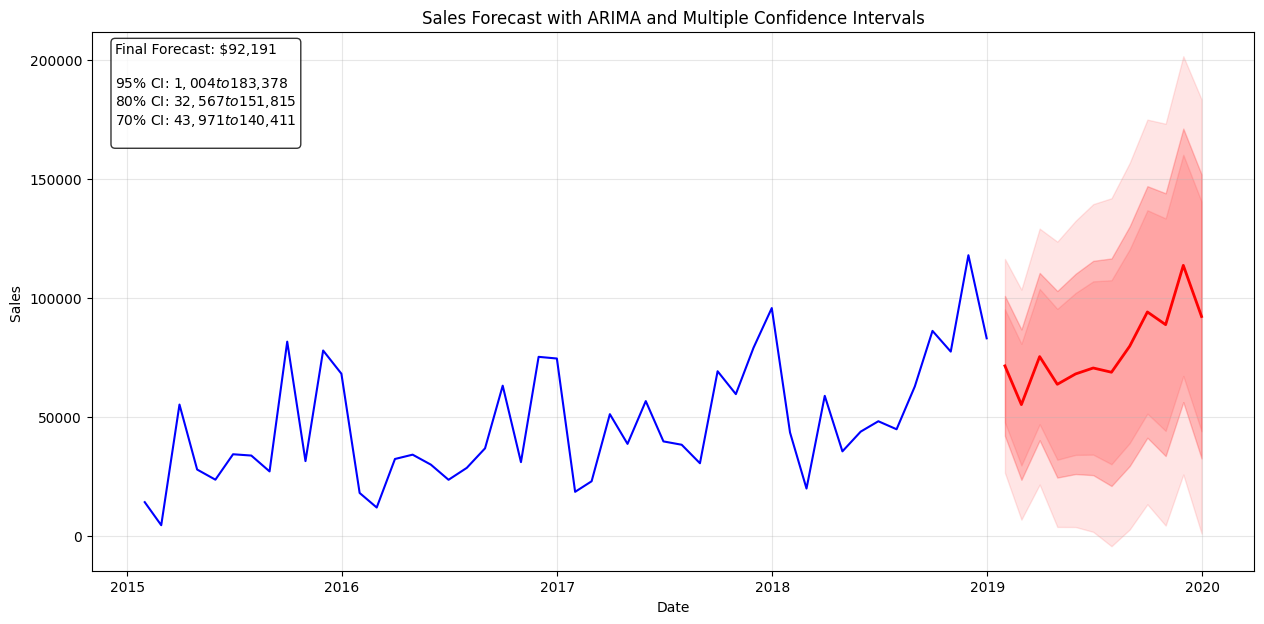

In [ ]:
plt.figure(figsize=(15, 7))

#plot historical data and forecast
plt.plot(monthly_sales, label='Historical Data', color='blue')
plt.plot(mean_forecast, label='Forecast', color='red', linewidth=2)

#Plot confidence intervals
plt.fill_between(mean_forecast.index,
                 conf_int_95.iloc[:,0],
                 conf_int_95.iloc[:,1],
                 color='red', alpha=0.1,
                 label='95% CI')

plt.fill_between(mean_forecast.index,
                 conf_int_80.iloc[:,0],
                 conf_int_80.iloc[:,1],
                 color='red', alpha=0.2,
                 label='80% CI')

plt.fill_between(mean_forecast.index,
                 conf_int_70.iloc[:,0],
                 conf_int_70.iloc[:,1],
                 color='red', alpha=0.1,
                 label='70% CI')

plt.title('Sales Forecast with ARIMA and Multiple Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Sales ')
plt.grid(True, alpha=0.3)

#Get final values
last_forecast = mean_forecast.iloc[-1]
ranges_95_lower = conf_int_95.iloc[-1, 0]
ranges_95_upper = conf_int_95.iloc[-1, 1]
ranges_80_lower = conf_int_80.iloc[-1, 0]
ranges_80_upper = conf_int_80.iloc[-1, 1]
ranges_70_lower = conf_int_70.iloc[-1, 0]
ranges_70_upper = conf_int_70.iloc[-1, 1]

#Create info text
info_text = f'Final Forecast: ${last_forecast:,.0f}\n\n'\
            f'95% CI: ${ranges_95_lower:,.0f} to ${ranges_95_upper:,.0f}\n'\
            f'80% CI: ${ranges_80_lower:,.0f} to ${ranges_80_upper:,.0f}\n'\
            f'70% CI: ${ranges_70_lower:,.0f} to ${ranges_70_upper:,.0f}\n'\

plt.text(0.02, 0.98, info_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

In [ ]:
#calculate and display metrics
print("\nModel Performance Metrics:")
mse = mean_squared_error(monthly_sales, results.fittedvalues)
rmse= np.sqrt(mse)
mae= mean_absolute_error(monthly_sales, results.fittedvalues)

print(f"Mean squared error (MSE): {mse:.2f}")
print(f"Root Mean squared error (RMSE): {rmse:.2f}")
print(f"Mean absolut  error (MAE): {mae:.2f}")

#print forecast information
print("\n Forecast Ranges for final period")
print(f"Point forecast: ${last_forecast:,.2f}")
print("\n Confidence Intervals")
print(f"95% CI: ${ranges_95_lower:,.2f} to ${ranges_95_upper:,.2f}")
print(f"80% CI: ${ranges_80_lower:,.2f} to ${ranges_80_upper:,.2f}")
print(f"70% CI: ${ranges_70_lower:,.2f} to ${ranges_70_upper:,.2f}")

#Calculate and print interval widths
print(f"95% CI: +-{((ranges_95_upper - ranges_95_lower) / 2/last_forecast*100):,.1f}%")
print(f"80% CI: +-{((ranges_80_upper - ranges_80_lower) / 2/last_forecast*100):,.1f}%")
print(f"70% CI: +-{((ranges_70_upper - ranges_70_lower) / 2/last_forecast*100):,.1f}%")

#Create forecast dataframe
forecast_df= pd.DataFrame({
    'Forecast': mean_forecast,
    '95% Lower': conf_int_95.iloc[:,0],
    '95% Upper': conf_int_95.iloc[:,1],
    '80% Lower': conf_int_80.iloc[:,0],
    '80% Upper': conf_int_80.iloc[:,1],
    '70% Lower': conf_int_70.iloc[:,0],
    '70% Upper': conf_int_70.iloc[:,1],

})

print("\nDetailed Forecast with Confidence Intervals:")
print(forecast_df)


Model Performance Metrics:
Mean squared error (MSE): 372198461.41
Root Mean squared error (RMSE): 19292.45
Mean absolut  error (MAE): 14432.38

 Forecast Ranges for final period
Point forecast: $92,191.07

 Confidence Intervals
95% CI: $1,003.72 to $183,378.42
80% CI: $32,566.87 to $151,815.28
70% CI: $43,970.99 to $140,411.15
95% CI: +-98.9%
80% CI: +-64.7%
70% CI: +-52.3%

Detailed Forecast with Confidence Intervals:
                 Forecast     95% Lower      95% Upper     80% Lower  \
2019-01-31   71457.294751  26519.448466  116395.141036  42074.016429   
2019-02-28   55170.675698   6856.399051  103484.952345  23579.668229   
2019-03-31   75354.273330  21594.176485  129114.370174  40202.435430   
2019-04-30   63712.967935   3787.033048  123638.902823  24529.505241   
2019-05-31   68065.122556   3753.333485  132376.911627  26013.903953   
2019-06-30   70562.386142   1722.863584  139401.908699  25550.641742   
2019-07-31   68781.958294  -4308.035962  141871.952550  20990.979836   


In [ ]:
#store each of the model configurations
models = []
specifications = [
    {
        'name': 'Fixed Parameters',
        'model': ExponentialSmoothing(
            monthly_sales,
            seasonal_periods=12,
            trend='add',
            seasonal='add',
            damped_trend=True
        ).fit(
            smoothing_level=0.2,
            smoothing_trend=0.1,
            smoothing_seasonal=0.1,
            damping_trend = 0.98,
            optimized=False
        )
    },
    {
        'name':'Multiplicative Seasonal',
        'model': ExponentialSmoothing(
            monthly_sales,
            seasonal_periods=12,
            trend='add',
            seasonal='mul',
            damped_trend=True

        ).fit(
            smoothing_level=0.2,
            smoothing_trend=0.1,
            smoothing_seasonal=0.1,
            damping_trend = 0.98,
            optimized=False
        )
    },
    {
        'name':'Multiplicative Trend',
        'model': ExponentialSmoothing(
            monthly_sales,
            seasonal_periods=12,
            trend='mul',
            seasonal='add',
            damped_trend=True
        ).fit(
            smoothing_level=0.2,
            smoothing_trend=0.1,
            smoothing_seasonal=0.1,
            damping_trend = 0.98,
            optimized=False

        )
    }
]

this code snippet sets up thre different variations of the Exponential Smoothing model with different assumptions about how the trend and seasonality affect the time series data. These models will likely be compared or evaluated further in the subsequent code to determine which one best fits and forecasts the monthly_sales data

- Smoothing is a technique used to reduce noide and fluctuations in time series data, revealing underlying patterns and trends. Remove noise, improve forecasting, enhance visualization.

- Damped trend is used in exponential smoothing models with a trend component. It reduces the impact of the projected trend over time, leading to more realistic forecasts and avoiding overestimation.

In [ ]:
results = []
for spec in specifications:
  model = spec['model']
  name= spec['name']

  #Calculate metrics
  rmse= np.sqrt(mean_squared_error(monthly_sales, model.fittedvalues))
  mae= mean_absolute_error(monthly_sales, model.fittedvalues)

  results.append({
      'name': name,
      'rmse': rmse,
      'mae': mae,
      'model': model
  })

In [ ]:
best_model= min(results, key=lambda x: x['rmse'])
hw_model= best_model['model']
hw_forecast= hw_model.forecast(12)

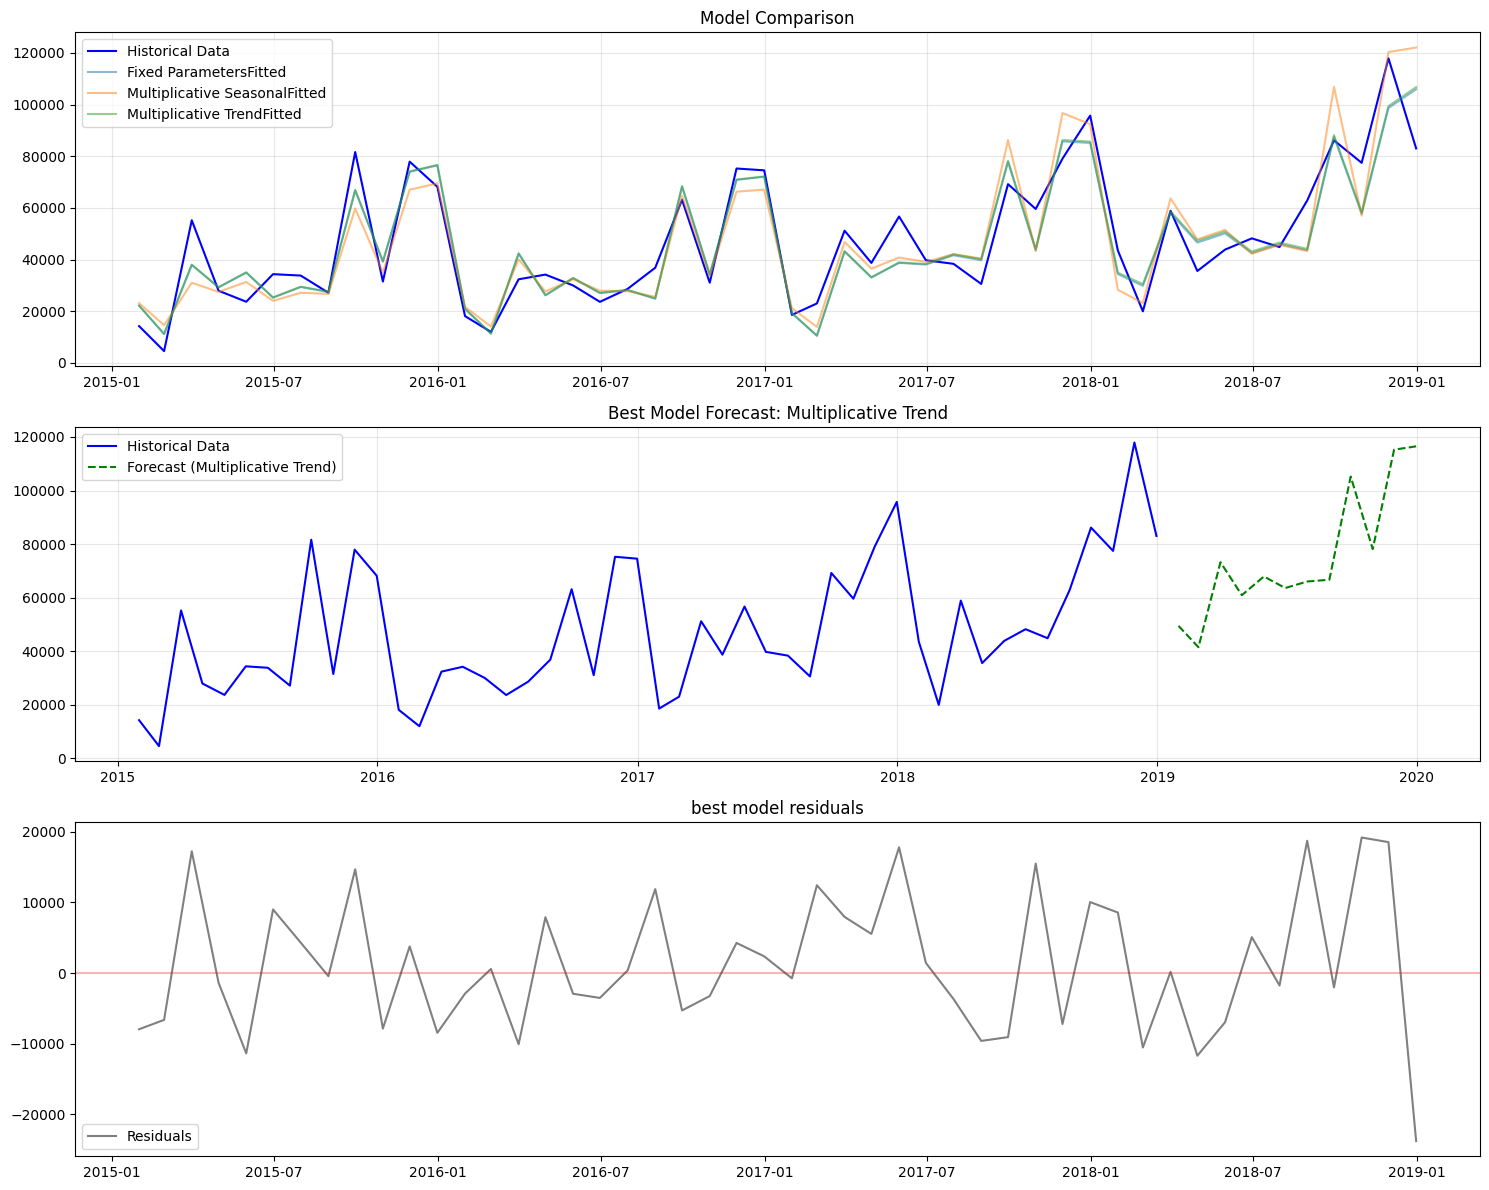

In [ ]:
plt.figure(figsize=(15, 12))

#first subplot: all modelss
plt.subplot(3, 1, 1)
plt.plot(monthly_sales.index, monthly_sales, label='Historical Data', color='blue')
for result in results:
  plt.plot(result['model'].fittedvalues.index,
           result['model'].fittedvalues,
           label=f"{result['name']}Fitted",
           alpha=0.5)

plt.title('Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

#Second subplot: best model forecast
plt.subplot(3, 1, 2)
plt.plot(monthly_sales.index, monthly_sales, label='Historical Data', color='blue')
plt.plot(hw_forecast.index, hw_forecast,
         label=f'Forecast ({best_model["name"]})',
         color='green', linestyle='--')

plt.title(f'Best Model Forecast: {best_model["name"]}')
plt.legend()
plt.grid(True, alpha=0.3)

#third subplot: residuals of best model
plt.subplot(3, 1, 3)
residuals = monthly_sales - hw_model.fittedvalues
plt.plot(monthly_sales.index, residuals, label='Residuals', color='gray')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3 )
plt.title('best model residuals')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("\n Model Comparison")
for result in results:
  print(f"\n {result['name']}:")
  print(f"RMSE: ${result['rmse']:.2f}")
  print(f"MAE: ${result['mae']:.2f}")

print(f"\n Best Model: {best_model['name']}")
print(f"Best RMSE: {best_model['rmse']:.2f}")


 Model Comparison

 Fixed Parameters:
RMSE: $9783.60
MAE: $7831.27

 Multiplicative Seasonal:
RMSE: $11758.67
MAE: $8762.04

 Multiplicative Trend:
RMSE: $9762.29
MAE: $7841.90

 Best Model: Multiplicative Trend
Best RMSE: 9762.29


In [ ]:
print("\nBest Model Parameters")
print(f"- Smoothing level: {hw_model.params['smoothing_level']:.3f}")
print(f"- Trend Smoothing: {hw_model.params['smoothing_trend']:.3f}")
print(f"- Seasonal Smoothing: {hw_model.params['smoothing_seasonal']:.3f}")
print(f"- Damping parameter: {hw_model.params['damping_trend']:.3f}")


Best Model Parameters
- Smoothing level: 0.200
- Trend Smoothing: 0.100
- Seasonal Smoothing: 0.100
- Damping parameter: 0.980


In [ ]:
hw_forecast

,0
2019-01-31,49435.711479
2019-02-28,41459.506838
2019-03-31,73220.555712
2019-04-30,60904.078997
2019-05-31,67886.536597
2019-06-30,63574.157506
2019-07-31,66020.931715
2019-08-31,66663.177848
2019-09-30,105201.488326
2019-10-31,78140.769889


In [ ]:
final_results = pd.DataFrame({
    'Actual': monthly_sales,
    'Fitted': hw_model.fittedvalues,
    'Residuals': residuals
})

In [ ]:
final_results

,Actual,Fitted,Residuals
Order Date,,,
2015-01-31,14205.7070,22155.386037,-7949.679037
2015-02-28,4519.8920,11146.811114,-6626.919114
2015-03-31,55205.7970,37975.018760,17230.778240
2015-04-30,27906.8550,29267.192066,-1360.337066
2015-05-31,23644.3030,35011.240872,-11366.937872
2015-06-30,34322.9356,25323.862069,8999.073531
2015-07-31,33781.5430,29471.746667,4309.796333
2015-08-31,27117.5365,27556.862748,-439.326248
2015-09-30,81623.5268,66942.870651,14680.656149
